In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [2]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

<AxesSubplot:>

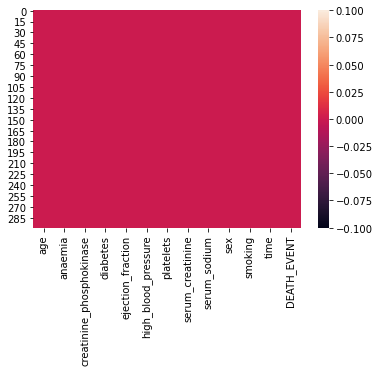

In [4]:
sns.heatmap(df.isnull())

In [5]:
categoric=[i for i in df.columns if len(df[i].unique())<=5]
continous=[i for i in df.columns if len(df[i].unique())>=5]

In [6]:
categoric

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [7]:
continous

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

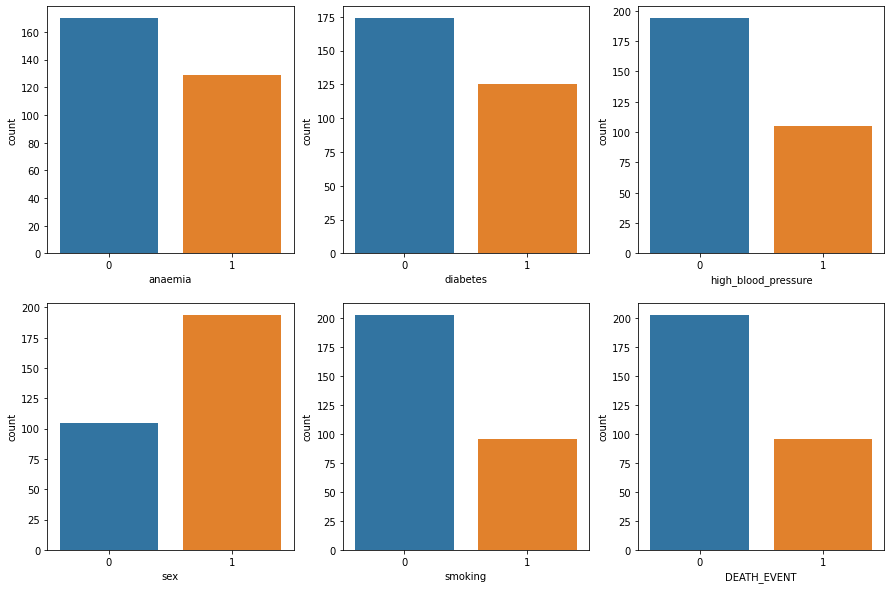

In [8]:
fig,axes=pl.subplots(2,3,figsize=(15,10))
for ax,i in zip(axes.flatten(),categoric):
    sns.countplot(df[i],ax=ax)


In [9]:
hist_data =[df["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

In [10]:
fig=px.box(df,x='sex',y='age',points='all')
fig.update_layout(title_text="Gender wise Age spread - male=1 female=0")
fig.show()


In [11]:
male=df[df['sex']==1]
female=df[df['sex']==0]
male_survi=male[male['DEATH_EVENT']==0]
male_not=male[male['DEATH_EVENT']==1]
female_survi=female[female['DEATH_EVENT']==0]
female_not=female[female['DEATH_EVENT']==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values=[len(male[male['DEATH_EVENT']==0]),len(male[male['DEATH_EVENT']==1]),
       len(female[female['DEATH_EVENT']==0]),len(female[female['DEATH_EVENT']==1])]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=.4)])
fig.update_layout(title='Analysis on Survival')

fig.show()

In [12]:
fig=go.Figure(data=[go.Bar(x=labels,y=values)])
fig.update_layout(title='Analysis on Survival')
fig.show()

In [13]:
survived=df[df['DEATH_EVENT']==0]['age']
not_survived=df[df['DEATH_EVENT']==1]['age']
hist_data=[survived,not_survived]
group_labels=['Survived','Not Survived']
fig=ff.create_distplot(hist_data,group_labels,bin_size=.5)
fig.update_layout(
    title_text="Analysis in Age on Survival Status")
fig.show()

In [14]:
fig=go.Figure()
fig.add_trace(go.Histogram(x=survived,bingroup=25))
fig.add_trace(go.Histogram(x=not_survived,bingroup=25))
fig.update_layout()

fig.show()

In [15]:
fig=px.violin(df,y='age',x='sex',box=True,
             points='all', #Can be changed to outliers if needed
             color="DEATH_EVENT"
             )

fig.show()

In [16]:
fig=px.violin(df,y='age',x='smoking',box=True,
             points='all', #Can be changed to outliers if needed
             color="DEATH_EVENT"
             )
fig.update_layout(title="Analysis in age and smoking on survital status")

fig.show()

In [17]:
fig=px.violin(df,y='age',x='diabetes',box=True,
             points='all', #Can be changed to outliers if needed
             color="DEATH_EVENT"
             )
fig.update_layout(title="Analysis in age and Diabetes on Survival status")
fig.show()

In [18]:
fig=px.histogram(df,x='creatinine_phosphokinase',
                color='DEATH_EVENT',
                marginal='violin',
                )
fig.show()

In [19]:
fig=px.histogram(df,x='ejection_fraction',
                color='DEATH_EVENT',
                marginal='violin',
                )
fig.show()

In [20]:
fig=px.histogram(df,x='platelets',
                color='DEATH_EVENT',
                marginal='violin',
                )
fig.show()

In [21]:
fig=px.histogram(df,x='serum_creatinine',
                color='DEATH_EVENT',
                marginal='violin',
                )
fig.show()

In [22]:
fig=px.histogram(df,x='serum_sodium',
                color='DEATH_EVENT',
                marginal='violin',
                )
fig.show()

In [23]:
surv=df[df['DEATH_EVENT']==0]['serum_sodium']
not_surv=df[df['DEATH_EVENT']==1]['serum_sodium']
hist_data=[surv,not_surv]
group_labels=['Survived','Not Survived']
fig=ff.create_distplot(hist_data,group_labels,bin_size=.5)
fig.update_layout(title_text="Analysis in Serum Sodium on Survival Status",
                 title_x=.5)

fig.show()

In [24]:
surv=df[df['DEATH_EVENT']==0]['serum_creatinine']
not_surv=df[df['DEATH_EVENT']==1]['serum_creatinine']
hist_data=[surv,not_surv]
group_labels=['Survived','Not Survived']
fig=ff.create_distplot(hist_data,group_labels,bin_size=.5)
fig.update_layout(title_text="Analysis in Serum Creatinine on Survival Status",
                 title_x=.5)

fig.show()

In [25]:
surv=df[df['DEATH_EVENT']==0]['ejection_fraction']
not_surv=df[df['DEATH_EVENT']==1]['ejection_fraction']
hist_data=[surv,not_surv]
group_labels=['Survived','Not Survived']
fig=ff.create_distplot(hist_data,group_labels,bin_size=.5)
fig.update_layout(title_text="Analysis in ejection fraction on Survival Status",
                 title_x=.5)

fig.show()

In [26]:
labels=['Diabetes','No Diabetes']
diabetes_yes=df[df['diabetes']==1]
diabetes_no=df[df['diabetes']==0]
values=[len(diabetes_yes),len(diabetes_no)]
fig=go.Figure(go.Pie(labels=labels,
                    values=values,
                     hole=.5,
                     direction='clockwise'
                    ))
fig.show()


In [27]:
fig = px.pie(df, values='diabetes',names='DEATH_EVENT', title='Diabetes Death Event Ratio',
            hole=0.5)
fig.update_layout(title_x=.5)
fig.show()

In [28]:
diabetes_yes=df[df['diabetes']==1]
diabetes_no=df[df['diabetes']==0]
diabetes_yes_survi=diabetes_yes[diabetes_yes['DEATH_EVENT']==0]
diabetes_yes_survi_not=diabetes_yes[diabetes_yes['DEATH_EVENT']==1]
diabetes_no_survi=diabetes_no[diabetes_no['DEATH_EVENT']==0]
diabetes_not_survi_not=diabetes_no[diabetes_no['DEATH_EVENT']==1]


In [29]:
fig=go.Figure(go.Pie(labels=['Diabetes yes- survived','Diabetes yes- not survived',
                            'Diabetes no - survived','Diabetes no- not survived'],
          values=[len(diabetes_yes_survi),len(diabetes_yes_survi_not),
                 len(diabetes_no_survi),len(diabetes_not_survi_not)],
                    hole=.5))
fig.update_layout(title='Diabetes and no diebetes survival pie plot',
                 title_x=.5)
fig.show()

In [30]:
anemia_yes=df[df['anaemia']==1]
anemia_no=df[df['anaemia']==0]
labels=['No Anemia','Anemia']
values=[len(anemia_no),len(anemia_yes)]
fig=go.Figure(data=go.Pie(labels=labels,values=values,hole=.5))
fig.update_layout(title_text='Anemia Analysis',title_x=.5)
fig.show()

In [31]:
fig = px.pie(df, values='anaemia',names='DEATH_EVENT', title='Anaemia Death Event Ration',hole=.5)
fig.show()

In [32]:
diabetes_yes=df[df['anaemia']==1]
diabetes_no=df[df['anaemia']==0]
diabetes_yes_survi=diabetes_yes[diabetes_yes['DEATH_EVENT']==0]
diabetes_yes_survi_not=diabetes_yes[diabetes_yes['DEATH_EVENT']==1]
diabetes_no_survi=diabetes_no[diabetes_no['DEATH_EVENT']==0]
diabetes_not_survi_not=diabetes_no[diabetes_no['DEATH_EVENT']==1]
fig=go.Figure(go.Pie(labels=['Anemia yes- survived','Anemia yes- not survived',
                            'Anemia no - survived','Anemia no- not survived'],
          values=[len(diabetes_yes_survi),len(diabetes_yes_survi_not),
                 len(diabetes_no_survi),len(diabetes_not_survi_not)],
                    hole=.5))
fig.update_layout(title='Anemia and no anemia survival pie plot',
                 title_x=.5)
fig.show()

In [33]:
hbp_yes=df[df['high_blood_pressure']==1]
hbp_no=df[df['high_blood_pressure']==0]

labels=['No High BP','High BP']
values=[len(hbp_no),len(hbp_yes)]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,
                          hole=.4)])
fig.update_layout(
    title_text="Analysis on - High Blood Pressure",title_x=.5)
fig.show()

In [35]:
fig = px.pie(df, values='high_blood_pressure',names='DEATH_EVENT', title='High Blood Pressure Death Event Ratio')
fig.show()

In [37]:
hbp_yes_survi = hbp_yes[df["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[df["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[df["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[df["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[hbp_yes["DEATH_EVENT"]==0]),len(hbp_yes[hbp_yes["DEATH_EVENT"]==1]),
         len(hbp_no[hbp_no["DEATH_EVENT"]==0]),len(hbp_no[hbp_no["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - HBP(high blood pressure)")
fig.show()

In [38]:
smoking_yes = df[df['smoking']==1]
smoking_no = df[df['smoking']==0]

labels = ['No Smoking','Smoking']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Smoking")
fig.show()

In [40]:
fig = px.pie(df, values='smoking',names='DEATH_EVENT', title='Smoking Death Event Ratio')
fig.show()

In [41]:
smoking_yes_survi = smoking_yes[df["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[df["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[df["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[df["DEATH_EVENT"]==1]

labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[df["DEATH_EVENT"]==0]),len(smoking_yes[df["DEATH_EVENT"]==1]),
         len(smoking_no[df["DEATH_EVENT"]==0]),len(smoking_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking")
fig.show()